# Анализ результатов работы модели по определению авторства "Тихого Дона"
По текстам авторов построена и обучена нейросеть.
Текст "Тихого Дона" разбит по главам и пропущен через нейросеть.
Результаты работы - в трех файлах: "result_Krukov.csv", "result_Sholokhov.csv" и "result_Tolstoy.csv" (проверочный)

In [152]:
import pandas as pd
import re
import matplotlib.pyplot as plt

%matplotlib inline

In [153]:
pdf_kru=pd.read_csv('result_Krukov.csv', sep=';', index_col=None, dtype={'Prob_1':float, 'Prob_2':float})

pdf_kru.head(10)
print(pdf_kru.shape)

(167, 7)


In [154]:
pdf_sho=pd.read_csv('result_Sholokhov.csv', sep=';', index_col=None, dtype={'Prob_1':float, 'Prob_2':float})
pdf_sho.head(10)

,book,part,head,auth,Prob_1,Prob_2,text
0,1,1,1,Sholokhov,0.412268,0.587732,Мелеховский двор — на самом краю хутора. Ворот...
1,1,1,2,Sholokhov,0.381762,0.618238,Редкие в пепельном рассветном небе зыбились зв...
2,1,1,3,Sholokhov,0.358668,0.641332,Григорий пришел с игрищ после первых кочетов. ...
3,1,1,4,NOT Sholokhov,0.565128,0.434872,К вечеру собралась гроза. Над хутором стала бу...
4,1,1,5,Sholokhov,0.483933,0.516067,До хутора Сетракова — места лагерного сбора — ...
5,1,1,6,Sholokhov,0.460284,0.539716,"Возле лобастого, с желтой песчаной лысиной кур..."
6,1,1,7,Sholokhov,0.433145,0.566855,Аксинью выдали за Степана семнадцати лет. Взял...
7,1,1,8,Sholokhov,0.364907,0.635093,За два дня до троицы хуторские делили луг. На ...
8,1,1,9,Sholokhov,0.467822,0.532178,От троицы только и осталось по хуторским двора...
9,1,1,10,Sholokhov,0.391564,0.608436,"Не лазоревым алым цветом, а собачьей бесилой, ..."


In [155]:
pdf_tol=pd.read_csv('result_Tolstoy.csv', sep=';', index_col=None, dtype={'Prob_1':float, 'Prob_2':float})
pdf_tol.head(10)

,book,part,head,auth,Prob_1,Prob_2,text
0,1,1,1,NOT Tolstoy,0.952493,0.047507,Мелеховский двор — на самом краю хутора. Ворот...
1,1,1,2,NOT Tolstoy,0.947842,0.052158,Редкие в пепельном рассветном небе зыбились зв...
2,1,1,3,NOT Tolstoy,0.951865,0.048135,Григорий пришел с игрищ после первых кочетов. ...
3,1,1,4,NOT Tolstoy,0.951971,0.048029,К вечеру собралась гроза. Над хутором стала бу...
4,1,1,5,NOT Tolstoy,0.904393,0.095607,До хутора Сетракова — места лагерного сбора — ...
5,1,1,6,NOT Tolstoy,0.925917,0.074083,"Возле лобастого, с желтой песчаной лысиной кур..."
6,1,1,7,NOT Tolstoy,0.750100,0.249900,Аксинью выдали за Степана семнадцати лет. Взял...
7,1,1,8,NOT Tolstoy,0.895146,0.104854,За два дня до троицы хуторские делили луг. На ...
8,1,1,9,NOT Tolstoy,0.943551,0.056449,От троицы только и осталось по хуторским двора...
9,1,1,10,NOT Tolstoy,0.897289,0.102711,"Не лазоревым алым цветом, а собачьей бесилой, ..."


## По количеству глав:

In [156]:
print('Кол-во глав с авторством Крюкова (по модели) :', len(pdf_kru[pdf_kru['Prob_2']>0.5]))
print('Кол-во глав с авторством Шолохова (по модели) :', len(pdf_sho[pdf_sho['Prob_2']>0.5]))
print('Кол-во глав с авторством Толстого (по модели) :', len(pdf_tol[pdf_tol['Prob_2']>0.5]))
print('Всего глав :', len(pdf_sho))

Кол-во глав с авторством Крюкова (по модели) : 68
Кол-во глав с авторством Шолохова (по модели) : 94
Кол-во глав с авторством Толстого (по модели) : 0
Всего глав : 167


 ## Средние вероятности:

In [157]:
print('Средняя (по главам) вероятность авторства Крюкова (по модели) :', pdf_kru['Prob_2'].mean())
print('Средняя (по главам) вероятность авторства Шолохова (по модели) :', pdf_sho['Prob_2'].mean())


Средняя (по главам) вероятность авторства Крюкова (по модели) : 0.4887439162201165
Средняя (по главам) вероятность авторства Шолохова (по модели) : 0.4986336200985792


## Характеристики распределений вероятностей "да" авторов

,Krukov,Sholokhov,Tolstoy
count,167.000000,167.000000,167.000000
mean,0.488744,0.498634,0.081341
std,0.143656,0.139770,0.077467
min,0.229177,0.090764,0.001064
25%,0.378633,0.417957,0.031270
50%,0.476665,0.519043,0.058398
75%,0.573759,0.589099,0.095135
max,0.907225,0.794433,0.404368


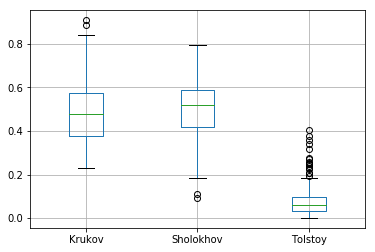

In [158]:
pdf_box=pd.merge(left=pdf_kru[['Prob_2']], right=pdf_sho[['Prob_2']], left_index=True, right_index=True).rename(columns={'Prob_2_x':'Krukov', 'Prob_2_y':'Sholokhov'})
pdf_box=pdf_box.merge(pdf_tol[['Prob_2']], left_index=True, right_index=True).rename(columns={'Prob_2':'Tolstoy'})

pdf_box.boxplot(column=['Krukov', 'Sholokhov', 'Tolstoy']);
pdf_box.describe()

## Вероятности по главам

### По всем главам

In [159]:
pdf_all=pdf_kru.merge(pdf_sho[['Prob_2', 'auth']], left_index=True, right_index=True).rename(columns={'Prob_2_x':'Krukov_prob', 
                                                                                                      'Prob_2_y':'Sholokhov_prob', 
                                                                                                     'auth_x':'Krukov', 'auth_y':'Sholokhov'})

pdf_all['target']=pdf_all[['book', 'part', 'head']].apply(lambda x: 'b{0}_h{1}'.format(x['book'], x['head']), axis=1)
pdf_all=pdf_all[['target', 'Krukov_prob', 'Sholokhov_prob', 'Krukov', 'Sholokhov', 'text']].set_index('target')
pdf_all.head(10)

,Krukov_prob,Sholokhov_prob,Krukov,Sholokhov,text
target,,,,,
b1_h1,0.336874,0.587732,NOT Krukov,Sholokhov,Мелеховский двор — на самом краю хутора. Ворот...
b1_h2,0.289980,0.618238,NOT Krukov,Sholokhov,Редкие в пепельном рассветном небе зыбились зв...
b1_h3,0.351058,0.641332,NOT Krukov,Sholokhov,Григорий пришел с игрищ после первых кочетов. ...
b1_h4,0.534493,0.434872,Krukov,NOT Sholokhov,К вечеру собралась гроза. Над хутором стала бу...
b1_h5,0.478662,0.516067,NOT Krukov,Sholokhov,До хутора Сетракова — места лагерного сбора — ...
b1_h6,0.434339,0.539716,NOT Krukov,Sholokhov,"Возле лобастого, с желтой песчаной лысиной кур..."
b1_h7,0.482903,0.566855,NOT Krukov,Sholokhov,Аксинью выдали за Степана семнадцати лет. Взял...
b1_h8,0.299900,0.635093,NOT Krukov,Sholokhov,За два дня до троицы хуторские делили луг. На ...
b1_h9,0.405973,0.532178,NOT Krukov,Sholokhov,От троицы только и осталось по хуторским двора...


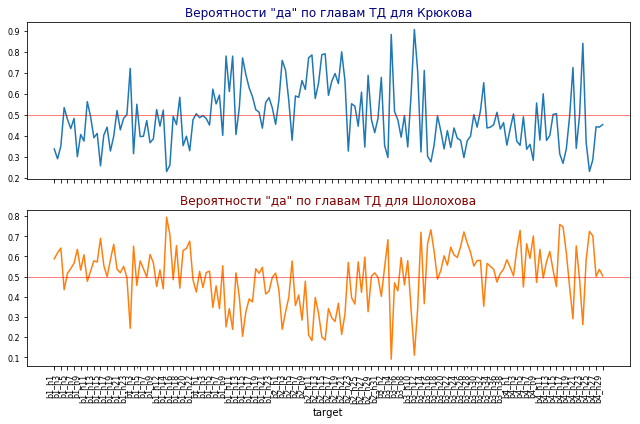

In [160]:
ax1, ax2=pdf_all[['Krukov_prob', 'Sholokhov_prob']].plot.line(subplots=True, sharex=True,figsize=(9, 6), legend=False)

ax1.tick_params(axis='both', which='major', labelsize=8)
ax2.tick_params(axis='both', which='major', labelsize=8)

ax2.set_xticks(ticks=list(range(len(pdf_all.index)))[::2])
ax2.set_xticklabels(pdf_all.index.tolist()[::2], rotation=90, fontsize=8)

ax1.axhline(y=0.5, color='red', linewidth=0.5)
ax2.axhline(y=0.5, color='red', linewidth=0.5)

ax1.set_title('Вероятности "да" по главам ТД для Крюкова', fontsize=12, color='navy')
ax2.set_title('Вероятности "да" по главам ТД для Шолохова', fontsize=12, color='maroon')


#ax2.set_xlabel('Date', fontsize=8)
plt.tight_layout();

## По "наиболее вероятным"

In [151]:
iLevel=0.75
pdf_strong=pdf_all[(pdf_all['Krukov_prob']>iLevel) | (pdf_all['Sholokhov_prob']>iLevel)]
pdf_strong

,Krukov_prob,Sholokhov_prob,Krukov,Sholokhov,text
target,,,,,
b1_h2,0.793622,0.260294,Krukov,NOT Sholokhov,Сергей Платонович Мохов издалека ведет свою ро...
b1_h14,0.296465,0.780072,NOT Krukov,Sholokhov,"Аксинья отстряпалась рано, загребла жар, закут..."
b1_h9,0.781006,0.253246,Krukov,NOT Sholokhov,"Из этого после сделали подвиг. Крючков, любиме..."
b1_h11,0.812423,0.234205,Krukov,NOT Sholokhov,"Небольшая в сафьяновом, цвета под дуб, перепле..."
b1_h14,0.818826,0.232782,Krukov,NOT Sholokhov,В первых числах августа сотник Евгений Листниц...
b2_h2,0.797512,0.242860,Krukov,NOT Sholokhov,На другой день утром смущенный вахмистр вошел ...
b2_h8,0.785053,0.336851,Krukov,NOT Sholokhov,"Первую бригаду одной из пехотных дивизий, нахо..."
b2_h10,0.803970,0.250943,Krukov,NOT Sholokhov,По возвращении из отпуска есаул Евгений Листни...
b2_h11,0.839746,0.188129,Krukov,NOT Sholokhov,Назначение генерала Корнилова главнокомандующи...
